0.0490117073059082
 MAPE (R2): 0.002186974435294589
R-squared (R2): 0.9998737211462225


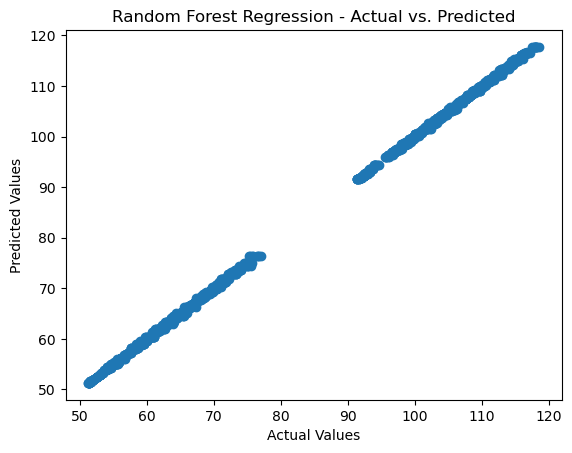

In [196]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import csv
import time

# Generate some example data
# Specify the path to your text file
file_path = 'data.txt'

# Use numpy's loadtxt function to load data from the text file
# Assuming the file contains numerical data separated by whitespace
dataset = np.loadtxt(file_path)

num_rows = dataset.shape[0]

# Create an array of indices and shuffle them
shuffled_indices = np.random.permutation(num_rows)

# Use the shuffled indices to reorder the rows in the dataset
dataset_mod = dataset[shuffled_indices, :]

splitRatio = 0.8; 
splitIndex = round(splitRatio * dataset_mod.shape[0]);
#print(splitIndex);

# Split the data into training and testing sets
X = dataset_mod[:,0:7];
#print(X.shape[1])
Y = dataset_mod[:,7];
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
maxdepth=8;
model = RandomForestRegressor(n_estimators=10, random_state=42,max_depth=maxdepth)

# Fit the model to the training data
model.fit(X_train, y_train)
end_time = time.time()
# Example: Make predictions on a new set of data
elapsed_time = end_time - start_time
print(elapsed_time)
# Make predictions on the test set
predictions = model.predict(X_test)

sum_1, sum_2,sum_3 = 0, 0,0

for ii in range (len(y_test)):
    sum_1=sum_1+(y_test[ii]-predictions[ii])**2
    sum_2=sum_2+(y_test[ii] -np.mean(y_test))**2
    sum_3=sum_3+abs(y_test[ii]-predictions[ii])/predictions[ii]

a=np.mean(y_test)
#print(a)
#print(sum_1)
#print(sum_2)

r2 = 1 - sum_1 /sum_2;
MAPE=sum_3/len(y_test)
print(f' MAPE (R2): {MAPE}')


print(f'R-squared (R2): {r2}')

# Visualize the predicted vs. actual values (optional)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression - Actual vs. Predicted')
plt.show()

flag=0
filename="../data regression in Python/result-test-pred.csv"
with open(filename, 'w',encoding="utf-8",newline='') as file:
    writer = csv.writer(file)
    for ii in range(len(y_test)):
        results_data=[y_test[ii],predictions[ii]]
        writer.writerow(results_data)
        flag=flag+1

In [197]:
# Get feature importances
feature_importances = model.feature_importances_
print (feature_importances)
num_rows = feature_importances.shape[0]
print(num_rows)

flag=0
filename="../data regression in Python/result-feature-importance.csv"
results_header=['U','R','N','e','O','COP','E']
with open(filename, 'w',encoding="utf-8",newline='') as file:
    writer = csv.writer(file)
    while(1):
        
        if flag == 0:
            writer.writerow(results_header)
            flag=flag+1
        else:
            results_data=[feature_importances[0],
                          feature_importances[1],
                          feature_importances[2],
                          feature_importances[3],
                          feature_importances[4],
                          feature_importances[5],
                          feature_importances[6]]
            writer.writerow(results_data)
            flag=flag+1
            break;
flag=0

[2.93909848e-03 9.48180738e-04 7.64601276e-04 0.00000000e+00
 0.00000000e+00 3.02295756e-02 9.65118544e-01]
7


In [198]:
from sklearn.inspection import permutation_importance
import pandas as pd

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
print(sorted_importances_idx)
a=result.importances[sorted_importances_idx].T
print(a)

[3 4 2 1 0 5 6]
[[0.00000000e+00 0.00000000e+00 1.45179670e-03 2.46794327e-03
  6.48804746e-03 5.87457322e-02 1.96536808e+00]
 [0.00000000e+00 0.00000000e+00 1.50215681e-03 2.37343403e-03
  6.96546118e-03 6.00669533e-02 1.92157997e+00]
 [0.00000000e+00 0.00000000e+00 1.47169476e-03 2.33690576e-03
  6.57766783e-03 5.79663655e-02 1.91415989e+00]
 [0.00000000e+00 0.00000000e+00 1.39998322e-03 2.39531774e-03
  6.68007524e-03 5.64090068e-02 1.95759047e+00]
 [0.00000000e+00 0.00000000e+00 1.48191818e-03 2.41222425e-03
  6.99992911e-03 5.88079284e-02 1.93949908e+00]
 [0.00000000e+00 0.00000000e+00 1.59378682e-03 2.33025023e-03
  6.16001836e-03 5.79709413e-02 1.86677062e+00]
 [0.00000000e+00 0.00000000e+00 1.52731975e-03 2.39943341e-03
  7.12038134e-03 5.66185063e-02 1.94911947e+00]
 [0.00000000e+00 0.00000000e+00 1.50512678e-03 2.56826895e-03
  6.84456651e-03 5.93551488e-02 1.89336106e+00]
 [0.00000000e+00 0.00000000e+00 1.42815176e-03 2.54044506e-03
  6.75808250e-03 5.91448192e-02 1.92825805

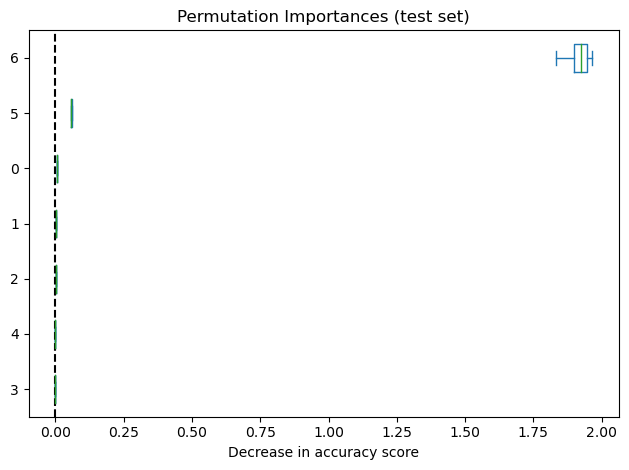

In [199]:
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=sorted_importances_idx,
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

flag=0
filename="../data regression in Python/result-permutation importances.csv"
with open(filename, 'w',encoding="utf-8",newline='') as file:
    writer = csv.writer(file)
    header=sorted_importances_idx
    writer.writerow(header)
    for ii in range(len(a)):
        results_data=[a[ii][0],a[ii][1],a[ii][2],a[ii][3],a[ii][4],a[ii][5],a[ii][6]]
        writer.writerow(results_data)
        flag=flag+1